In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
nueva_ruta = 'C:\\Users\\bbrst\\OneDrive\\Documentos\\ESTUDIOS\\Data Science\\00 Desafio'
os.chdir(nueva_ruta)
df = pd.read_excel("Flight_Satisfaction.xlsx")
print(df.shape)
print(df.info())
print(df.describe())

(25976, 25)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 25976 non-null  int64  
 1   Gender                             25976 non-null  object 
 2   Customer Type                      25976 non-null  object 
 3   Age                                25976 non-null  int64  
 4   Type of Travel                     25976 non-null  object 
 5   Class                              25976 non-null  object 
 6   Flight Distance                    25976 non-null  int64  
 7   Inflight wifi service              25976 non-null  int64  
 8   Departure/Arrival time convenient  25976 non-null  int64  
 9   Ease of Online booking             25976 non-null  int64  
 10  Gate location                      25976 non-null  int64  
 11  Food and drink                     25976 n

In [5]:
cambio_genero = {'Male': 1, 'Female': 0}
df['genero_binario'] = df['Gender'].map(cambio_genero)
print(df[['Gender', 'genero_binario']])

       Gender  genero_binario
0      Female               0
1      Female               0
2        Male               1
3        Male               1
4      Female               0
...       ...             ...
25971    Male               1
25972    Male               1
25973  Female               0
25974    Male               1
25975  Female               0

[25976 rows x 2 columns]


OBJETIVO: Predecir si mis clientes estarán satisfechos o no con el servicio de la aerolínea



Contexto comercial
El servicio de las aerolineas es muy importante para atraer a la demanda, es por esto que debemos saber cuakles son los más importantes y que generarán satisfacción en el cliente


Problema comercial
Sin saber que servicios son los más importantes, no se puede ver el problema de raíz para verificar si un cliente estará satisfecho con la empresa. 


Contexto analítico
Para poder desarrollar el modelo se cuenta con un conjunto de 25976 clientes

Las variables disponibles (23) son las siguientes:


 0   id
 1   Gender: genero de la persona que utilizó el servicio
 2   Customer Type: indica si el cliente es leal o no a la aerolínea
 3   Age: año de la persona que utilizó el servicio 
 4   Type of Travel: motivo del viaje
 5   Class: tipo de viaje pagado
 6   Flight Distance: distacia de vuelo
 7   Inflight wifi service: nota del servicio de wifi (1-5) 
 8   Departure/Arrival time convenient: nota por llegada o salida conveniente (1-5) 
 9   Ease of Online booking:  nota por facilidad de reserva en línea (1-5) 
 10  Gate location: nota ubicacion puerta de embarque (1-5) 
 11  Food and drink: nota servicio de comida (1-5)  
 12  Online boarding: nota servicio tasa de embarque en línea (1-5)  
 13  Seat comfort: nota comodidad asiento (1-5) 
 14  Inflight entertainment: nota entretenimiento en vuelo (1-5) 
 15  On-board service: nota servicio en el vuelo (1-5) 
 16  Leg room service: nota servicio en el vuelo (1-5) 
 17  Baggage handling: nota manejo de equipaje (1-5) 
 18  Checkin service: nota servicio checkin (1-5) 
 19  Inflight service: nota servicio en vuelo (1-5) 
 20  Cleanliness: nota limpieza (1-5)
 21  Departure Delay in Minutes: atraso de la salida en minutos
 22  Arrival Delay in Minutes: atraso de la llegada en minutos
 23  satisfaction: nivel de satisfaccion del cliente

Variable Target: SalePrice
La variable objetivo es de tipo numérica, por lo que el modelo a desarrollar será de tipo Aprendizaje Supervisado: Regresión.

In [47]:
# Como es la correlacion de mi variable target con los demás
matriz_correlacion = df_numeric.corr(method='pearson') 
matriz_correlacion_target = matriz_correlacion['satisfactionb'] 
matriz_correlacion_target = abs(matriz_correlacion_target)
columnas_a_excluir = ['satisfactionb']
matriz_correlacion_target = matriz_correlacion_target.drop(columns=columnas_a_excluir, index=columnas_a_excluir)
matriz_correlacion_target = matriz_correlacion_target.sort_values(ascending=False)

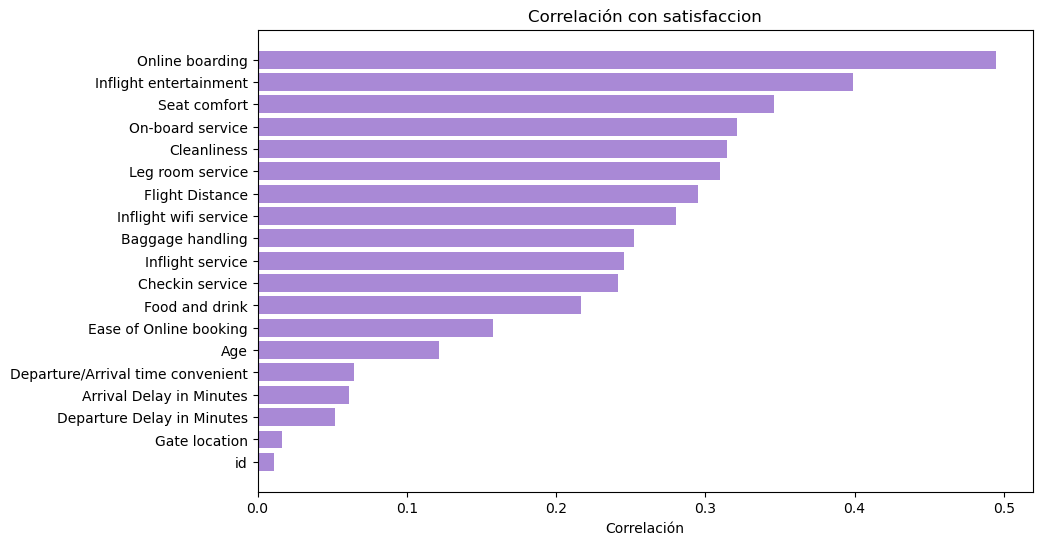

In [54]:
matriz_correlacion_target_graficar = matriz_correlacion_target[0:20]
plt.figure(figsize=(10, 6))  
plt.barh(matriz_correlacion_target_graficar.index, 
         matriz_correlacion_target_graficar.values,
         color = '#A989D6')
plt.xlabel('Correlación')
plt.title('Correlación con satisfaccion')
plt.gca().invert_yaxis() 
plt.show()

In [3]:
# La base de datos de clientes los cuales evaluan a la aerolinea y asi medir su satisfacción, por ende, tengo que ver cuales son mis puntos criticos dentro de los servicios a entragar para que obtenga el mayor ratio de clientes satisfechos, las preguntas:
# ¿La edad de la persona implicará que esta sea mas quisquillosa con los servicios? ¿Los tipos de ticket implicaran un mejor servicio? ¿El sexo juega un rol en la base de datos?

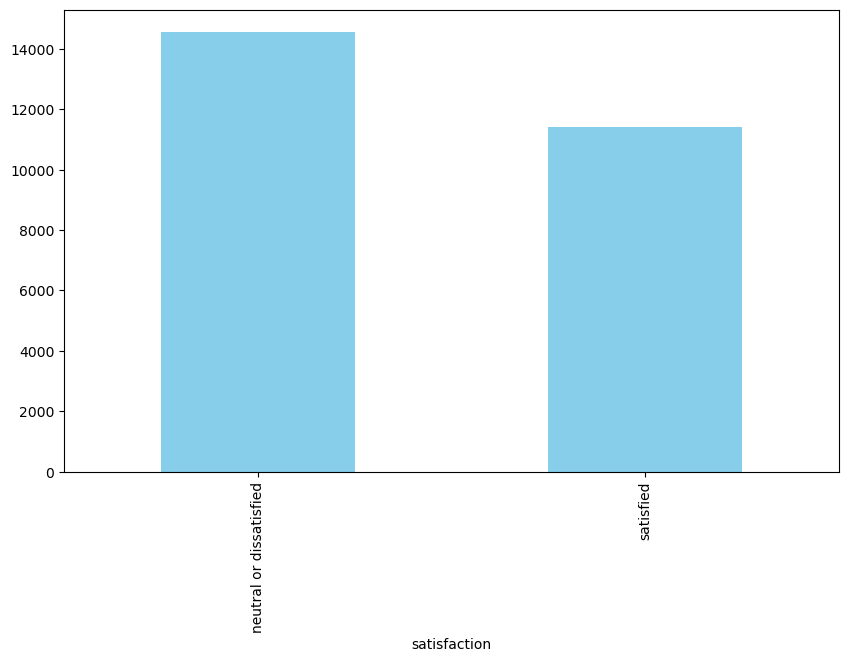

In [4]:
# Dentro de la base hay màs personas insatisfechas que satisfechas
conteo_valores = df['satisfaction'].value_counts()
plt.figure(figsize=(10, 6))  
conteo_valores.plot(kind='bar', color='skyblue')
plt.show()

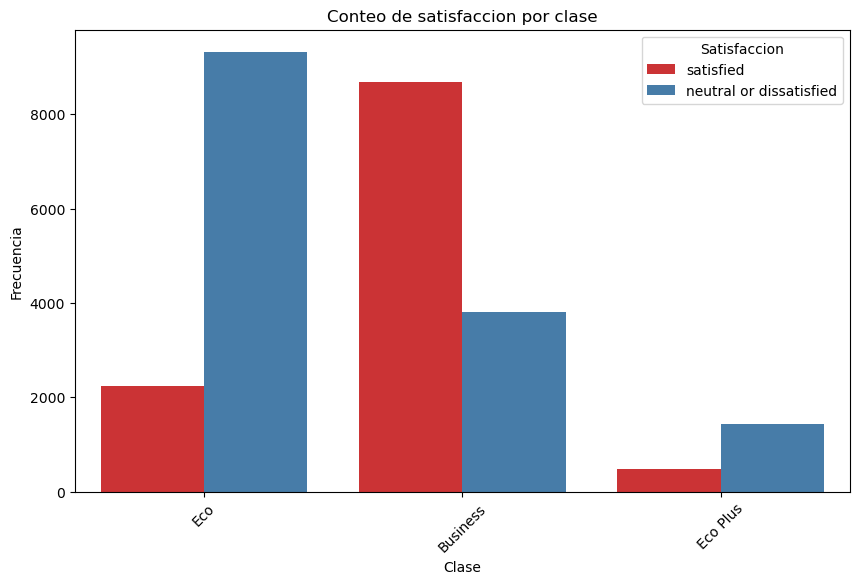

In [5]:
# Fuera del business, los clientes estan insatisfechos con el servicio

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Class', hue='satisfaction', palette='Set1')

plt.title('Conteo de satisfaccion por clase')
plt.xlabel('Clase')
plt.ylabel('Frecuencia')

plt.legend(title='Satisfaccion')
plt.xticks(rotation=45)
plt.show()






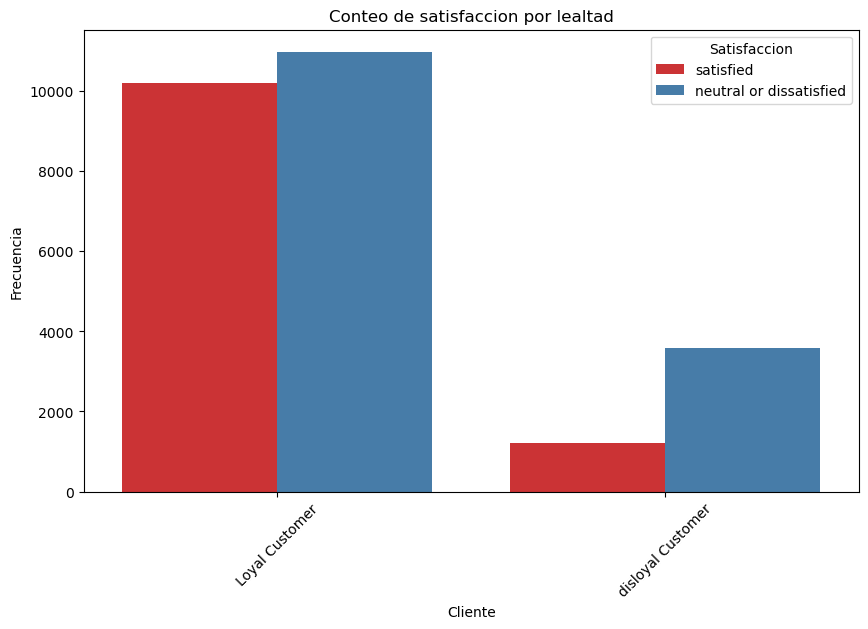

In [6]:
# Tanto clientes leales como no leales no estan satisfechos con el servicio

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Customer Type', hue='satisfaction', palette='Set1')

plt.title('Conteo de satisfaccion por lealtad')
plt.xlabel('Cliente')
plt.ylabel('Frecuencia')

plt.legend(title='Satisfaccion')
plt.xticks(rotation=45)
plt.show()

<Axes: xlabel='Class', ylabel='Age'>

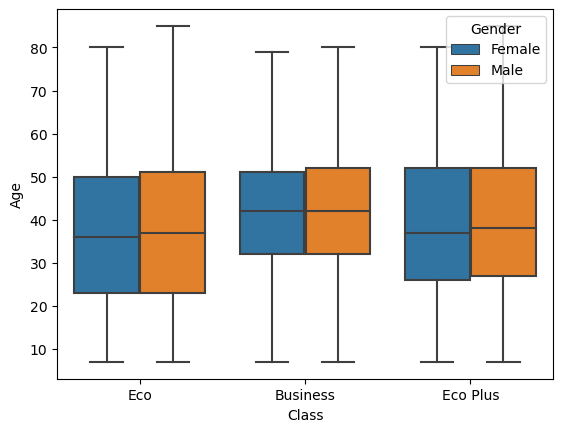

In [7]:
plt.figure()
sns.boxplot(data = df,
            x = 'Class',
            y = 'Age', 
            hue = 'Gender',
            showfliers = False)

<Axes: xlabel='Age', ylabel='Probability'>

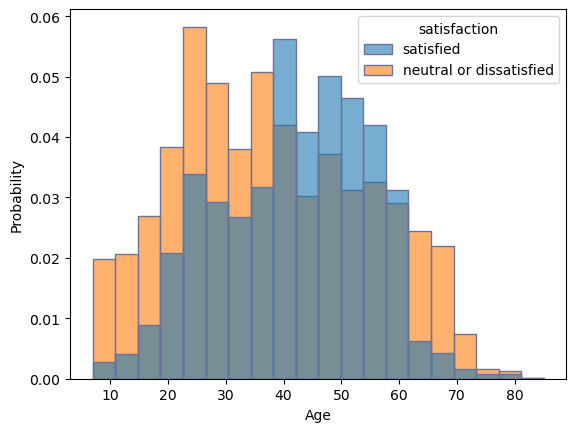

In [2]:
# Los clientes mas satisfechos se encuentran entre un rango de 40 a 60 años
plt.figure()
sns.histplot(data = df,
             x = 'Age',
             alpha = 0.6,
             edgecolor = '#6B7498',
             stat = 'probability', 
             bins = 20,
             hue = 'satisfaction')

<Axes: xlabel='Gender', ylabel='Probability'>

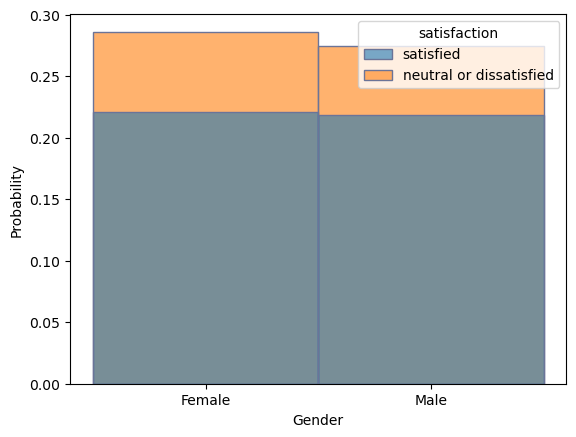

In [3]:
# Los clientes mas satisfechos se encuentran entre un rango de 40 a 60 años
plt.figure()
sns.histplot(data = df,
             x = 'Gender',
             alpha = 0.6,
             edgecolor = '#6B7498',
             stat = 'probability', 
             bins = 20,
             hue = 'satisfaction')

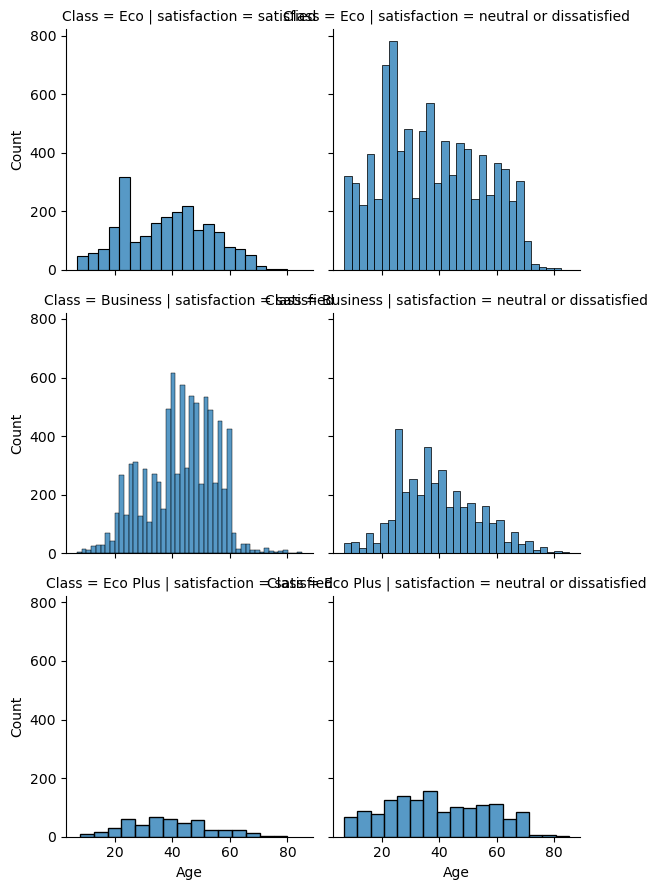

In [9]:
# Los clientes satisfechos se ven en la clase "Business" en donde la mayoria ronda entre 40 y 60 años, grupos Eco es donde mas clientes insatisfechos hay
g = sns.FacetGrid(df,  
                  col = "satisfaction",  
                  row = "Class")
g.map(sns.histplot, "Age") 

<Axes: xlabel='Inflight entertainment', ylabel='Probability'>

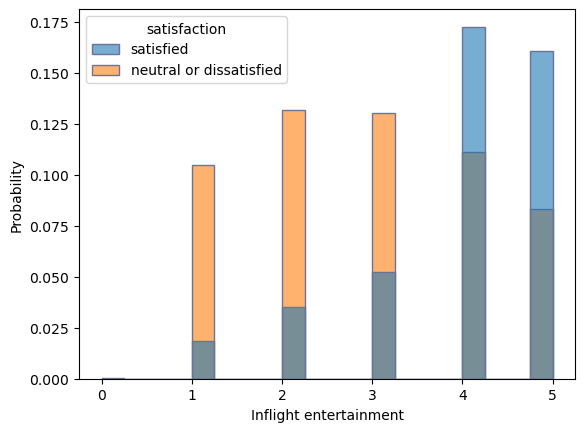

In [9]:
plt.figure()
sns.histplot(data = df,
             x = 'Inflight entertainment',
             alpha = 0.6,
             edgecolor = '#6B7498',
             stat = 'probability', 
             bins = 20,
             hue = 'satisfaction')

<Axes: xlabel='Seat comfort', ylabel='Probability'>

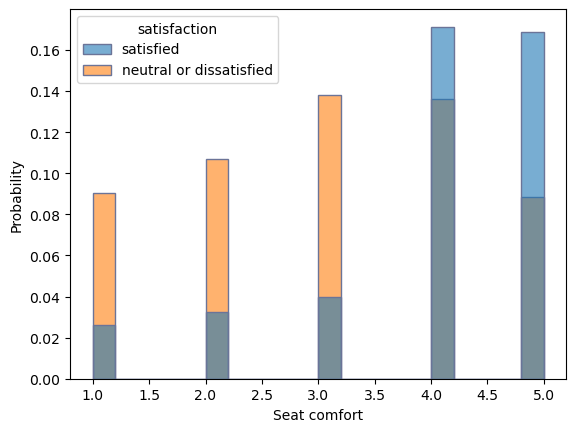

In [10]:
plt.figure()
sns.histplot(data = df,
             x = 'Seat comfort',
             alpha = 0.6,
             edgecolor = '#6B7498',
             stat = 'probability', 
             bins = 20,
             hue = 'satisfaction')

<Axes: xlabel='On-board service', ylabel='Probability'>

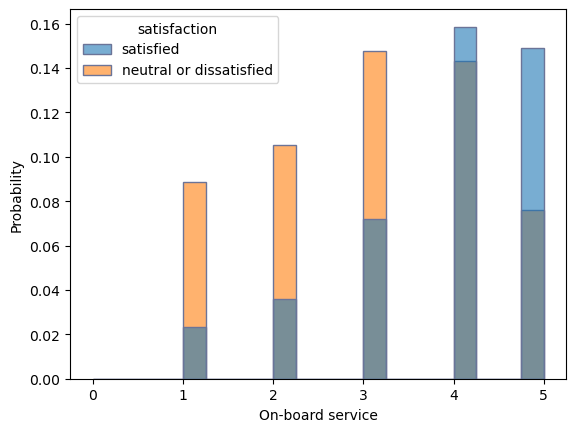

In [11]:
plt.figure()
sns.histplot(data = df,
             x = 'On-board service',
             alpha = 0.6,
             edgecolor = '#6B7498',
             stat = 'probability', 
             bins = 20,
             hue = 'satisfaction')

<Axes: xlabel='Cleanliness', ylabel='Probability'>

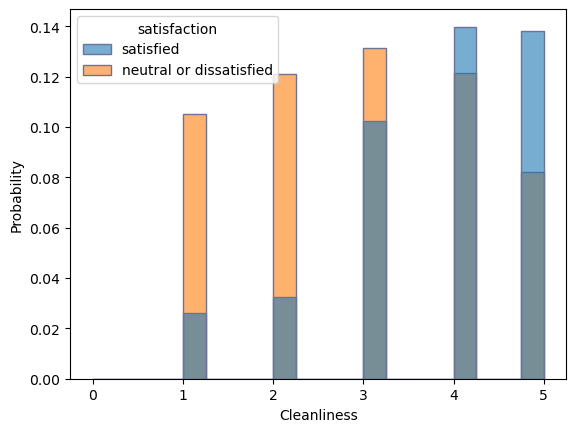

In [13]:
plt.figure()
sns.histplot(data = df,
             x = 'Cleanliness',
             alpha = 0.6,
             edgecolor = '#6B7498',
             stat = 'probability', 
             bins = 20,
             hue = 'satisfaction')

<Axes: xlabel='Class', ylabel='Flight Distance'>

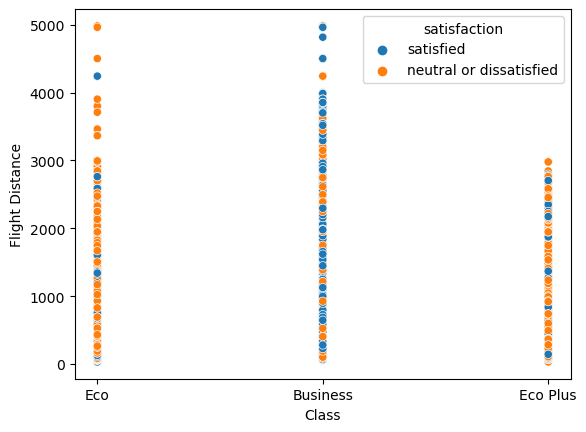

In [14]:
plt.figure()
sns.scatterplot(data = df,
                x = 'Class',
                y = 'Flight Distance',
               hue = 'satisfaction')

<Axes: xlabel='Flight Distance', ylabel='Probability'>

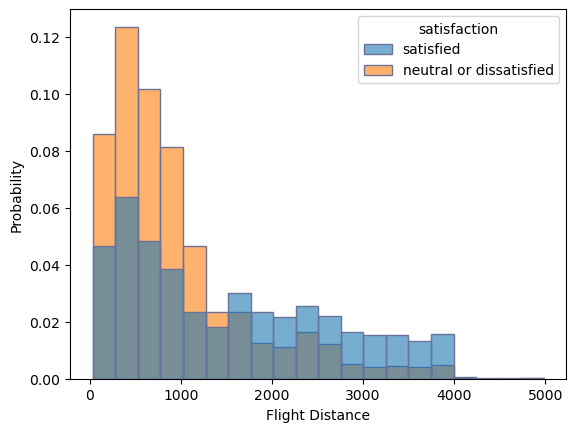

In [11]:
# A medida que las distancias son mas largas que 1500 el cliente está más satisfecho con el servicio
plt.figure()
sns.histplot(data = df,
             x = 'Flight Distance',
             alpha = 0.6,
             edgecolor = '#6B7498',
             stat = 'probability', 
             bins = 20,
             hue = 'satisfaction')

<Axes: xlabel='Departure Delay in Minutes', ylabel='Probability'>

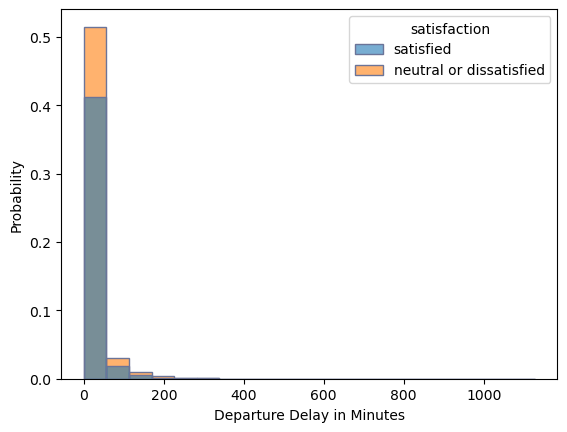

In [12]:
# Atrasos llevan a tener un porcentaje mayor de cleintes no satisfechos
plt.figure()
sns.histplot(data = df,
             x = 'Departure Delay in Minutes',
             alpha = 0.6,
             edgecolor = '#6B7498',
             stat = 'probability', 
             bins = 20,
             hue = 'satisfaction')

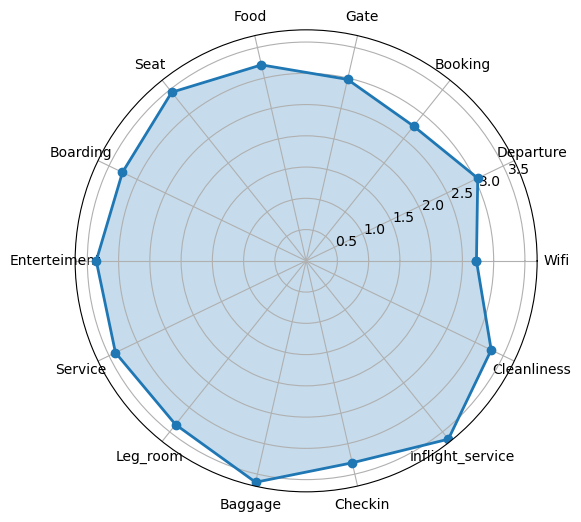

In [13]:

categorias = ['Wifi', 'Departure', 'Booking', 'Gate', 'Food', 'Seat', 'Boarding', 
              'Enterteiment', 'Service', 'Leg_room', 'Baggage', 'Checkin', 'Inflight_service', 'Cleanliness']

Wifi = df['Inflight wifi service'].mean()
Departure = df['Departure/Arrival time convenient'].mean()
Booking = df['Ease of Online booking'].mean()
Gate = df['Gate location'].mean()
Food = df['Food and drink'].mean()
Seat = df['Seat comfort'].mean()
Boarding = df['Online boarding'].mean()
Enterteiment = df['Inflight entertainment'].mean()
Service = df['On-board service'].mean()
Leg_room = df['Leg room service'].mean()
Baggage = df['Baggage handling'].mean()
Checkin = df['Checkin service'].mean()
Inflight_service = df['Inflight service'].mean()
Cleanliness = df['Cleanliness'].mean()


valores = [Wifi, Departure, Booking, Gate, Food, Seat, Boarding, 
           Enterteiment, Service, Leg_room, Baggage, Checkin, Inflight_service, Cleanliness]

num_categorias = len(categorias)
angulos = np.linspace(0, 2 * np.pi, num_categorias, endpoint=False).tolist()
angulos += angulos[:1]

valores += valores[:1]

radar = plt.figure(figsize=(6, 6))
plt.polar(angulos, valores, 'o-', linewidth=2)

plt.xticks(angulos[:-1], categorias)

plt.fill(angulos, valores, alpha=0.25)

plt.show()

In [14]:
valores_agrupados = df.groupby('satisfaction')[['Inflight wifi service','Departure/Arrival time convenient',
                                                'Ease of Online booking','Gate location','Food and drink',
                                               'Seat comfort','Online boarding',
                                                'Inflight entertainment','On-board service','Leg room service',
                                                'Baggage handling','Checkin service','Inflight service',
                                                'Cleanliness']].mean().reset_index()

print(valores_agrupados.head())

              satisfaction  Inflight wifi service  \
0  neutral or dissatisfied               2.393536   
1                satisfied               3.148031   

   Departure/Arrival time convenient  Ease of Online booking  Gate location  \
0                           3.134701                2.559665       2.995951   
1                           2.934491                3.008682       2.952995   

   Food and drink  Seat comfort  Online boarding  Inflight entertainment  \
0        2.959926      3.044878         2.668702                2.885473   
1        3.541787      3.965974         4.019469                3.961326   

   On-board service  Leg room service  Baggage handling  Checkin service  \
0          3.021066          2.988952          3.370548         3.043025   
1          3.851618          3.811804          3.968956         3.660703   

   Inflight service  Cleanliness  
0          3.392781     2.919371  
1          3.977024     3.755064  


In [15]:
df_melted = pd.melt(valores_agrupados, 
                    id_vars = ['satisfaction'], 
                    var_name = 'Caracteristica', 
                    value_name = 'Valor')

df_melted = pd.DataFrame(df_melted)
print(df_melted.head())

              satisfaction                     Caracteristica     Valor
0  neutral or dissatisfied              Inflight wifi service  2.393536
1                satisfied              Inflight wifi service  3.148031
2  neutral or dissatisfied  Departure/Arrival time convenient  3.134701
3                satisfied  Departure/Arrival time convenient  2.934491
4  neutral or dissatisfied             Ease of Online booking  2.559665


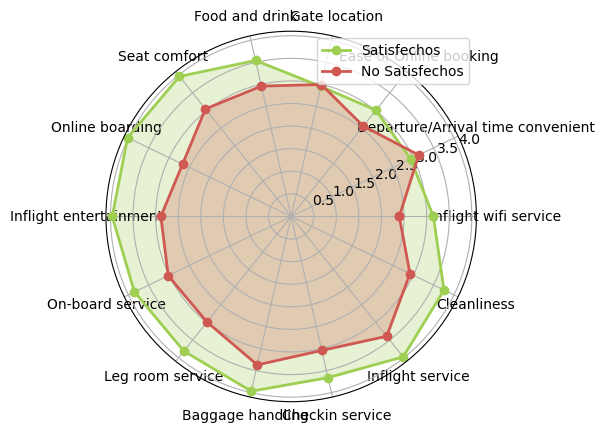

In [16]:
# Con esto vemos que hay factores que no influyen enla decision de satisfaccion del cliente ya que obtienen el mismo promedio, 
# pero otras que se alejan bastante como por ejemplo el entretenimiento o la comodidad del asiento
plt.figure(figsize= (10, 5))

plt.subplot(1, 2, 1,polar=True)
df_melted_1 = df_melted.loc[df_melted['satisfaction'] == "satisfied",]
categorias = list(df_melted_1['Caracteristica'])
valores = list(df_melted_1['Valor'])

num_categorias = len(categorias)
angulos = np.linspace(0, 2 * np.pi, num_categorias, endpoint=False).tolist()
angulos += angulos[:1]

valores += valores[:1]

plt.polar(angulos, valores, 'o-', linewidth=2,label='Satisfechos',color = '#9ECF52')

plt.xticks(angulos[:-1], categorias)

plt.fill(angulos, valores, alpha=0.25,color = '#9ECF52')

plt.tight_layout()


# SEGUNDO GRAFICO
plt.subplot(1, 2, 1,polar=True)

df_melted_1 = df_melted.loc[df_melted['satisfaction'] == "neutral or dissatisfied",]
categorias = list(df_melted_1['Caracteristica'])
valores = list(df_melted_1['Valor'])

num_categorias = len(categorias)
angulos = np.linspace(0, 2 * np.pi, num_categorias, endpoint=False).tolist()
angulos += angulos[:1]

valores += valores[:1]

plt.polar(angulos, valores, 'o-', linewidth=2,label='No Satisfechos',color = '#CF5852')

plt.xticks(angulos[:-1], categorias)

plt.fill(angulos, valores, alpha=0.25,color = '#CF5852')

plt.tight_layout()

plt.legend()

Con esto vemos que hay factores que no influyen enla decision de satisfaccion del cliente ya que obtienen el mismo promedio, 
pero otras que se alejan bastante como por ejemplo el entretenimiento o la comodidad del asiento

Text(0, 0.5, 'Cantidad calificaciones')

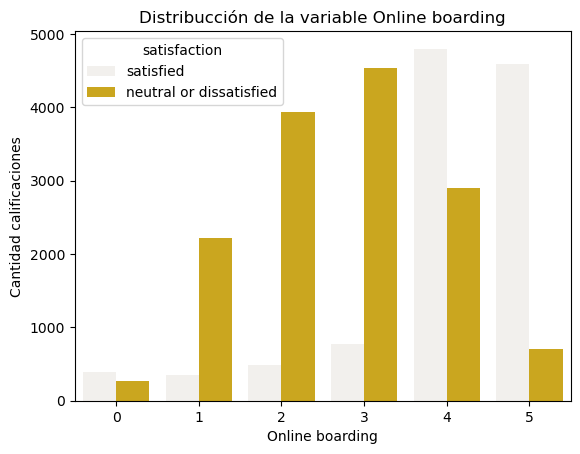

In [53]:
# a medida que mejora la nota en "online boarding", se obtienen mayor cantidad de clientes satisfechos
plt.figure()
sns.countplot(data = df,
              x = 'Online boarding',
              hue = 'satisfaction',
             color = '#E7B602')
plt.title('Distribucción de la variable Online boarding')
plt.ylabel('Cantidad calificaciones')